In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import plot_tree,export_text
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [2]:
wine_df=pd.read_csv('WineQT.csv')
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
wine_df.drop(inplace=True,columns=['Id'])

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [5]:
X=wine_df.drop(columns=['quality'])
y=wine_df['quality']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
random_forest_model=RandomForestClassifier(random_state=42,n_estimators=15)
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15, random_state=42)

In [8]:
predicted_values=random_forest_model.predict(X_test)

In [9]:
wine_quality_report=classification_report(y_test,predicted_values)
print(wine_quality_report)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.76      0.74        96
           6       0.64      0.66      0.65        99
           7       0.67      0.62      0.64        26
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.41      0.41      0.41       229
weighted avg       0.65      0.67      0.66       229



In [10]:
wine_quality_confusion_matrix=confusion_matrix(y_test,predicted_values)
print(wine_quality_confusion_matrix)

[[ 0  3  3  0  0]
 [ 0 73 23  0  0]
 [ 2 25 65  7  0]
 [ 0  0 10 16  0]
 [ 0  0  1  1  0]]


<Axes: >

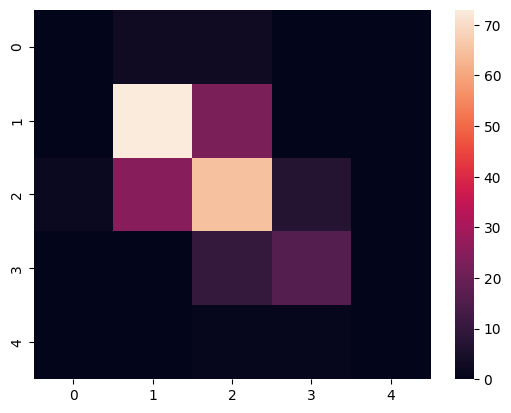

In [11]:
sns.heatmap(wine_quality_confusion_matrix)

In [12]:
random_forest_accuracy=accuracy_score(y_test,predicted_values)
accuray_wine_quality={"random_forest_classifier":random_forest_accuracy}
accuray_wine_quality

{'random_forest_classifier': 0.6724890829694323}

In [13]:
Logistic_model=LogisticRegression()
Logistic_model.fit(X_train,y_train)

LogisticRegression()

In [14]:
logistic_predicted_values=Logistic_model.predict(X_test)
logistic_accuracy=accuracy_score(y_test,logistic_predicted_values)
accuray_wine_quality['logistic_classifier']=logistic_accuracy
accuray_wine_quality

{'random_forest_classifier': 0.6724890829694323,
 'logistic_classifier': 0.6069868995633187}

In [15]:
SVC_model=SVC()
SVC_model.fit(X_train,y_train)

SVC()

In [16]:
SVC_model_predicted_values=SVC_model.predict(X_test)
SVC_accuracy=accuracy_score(y_test,SVC_model_predicted_values)
accuray_wine_quality['SVC_classifier']=SVC_accuracy
accuray_wine_quality

{'random_forest_classifier': 0.6724890829694323,
 'logistic_classifier': 0.6069868995633187,
 'SVC_classifier': 0.5633187772925764}

|--- density <= 1.00
|   |--- sulphates <= 0.47
|   |   |--- chlorides <= 0.06
|   |   |   |--- density <= 0.99
|   |   |   |   |--- class: 3.0
|   |   |   |--- density >  0.99
|   |   |   |   |--- chlorides <= 0.06
|   |   |   |   |   |--- density <= 0.99
|   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- density >  0.99
|   |   |   |   |   |   |--- total sulfur dioxide <= 46.50
|   |   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |   |--- total sulfur dioxide >  46.50
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- chlorides >  0.06
|   |   |   |   |   |--- class: 1.0
|   |   |--- chlorides >  0.06
|   |   |   |--- class: 2.0
|   |--- sulphates >  0.47
|   |   |--- citric acid <= 0.30
|   |   |   |--- fixed acidity <= 5.35
|   |   |   |   |--- free sulfur dioxide <= 18.50
|   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- free sulfur dioxide >  18.50
|   |   |   |   |   |--- total sulfur dioxide <= 56.50
|   |   |   |   |   |   |--- cla

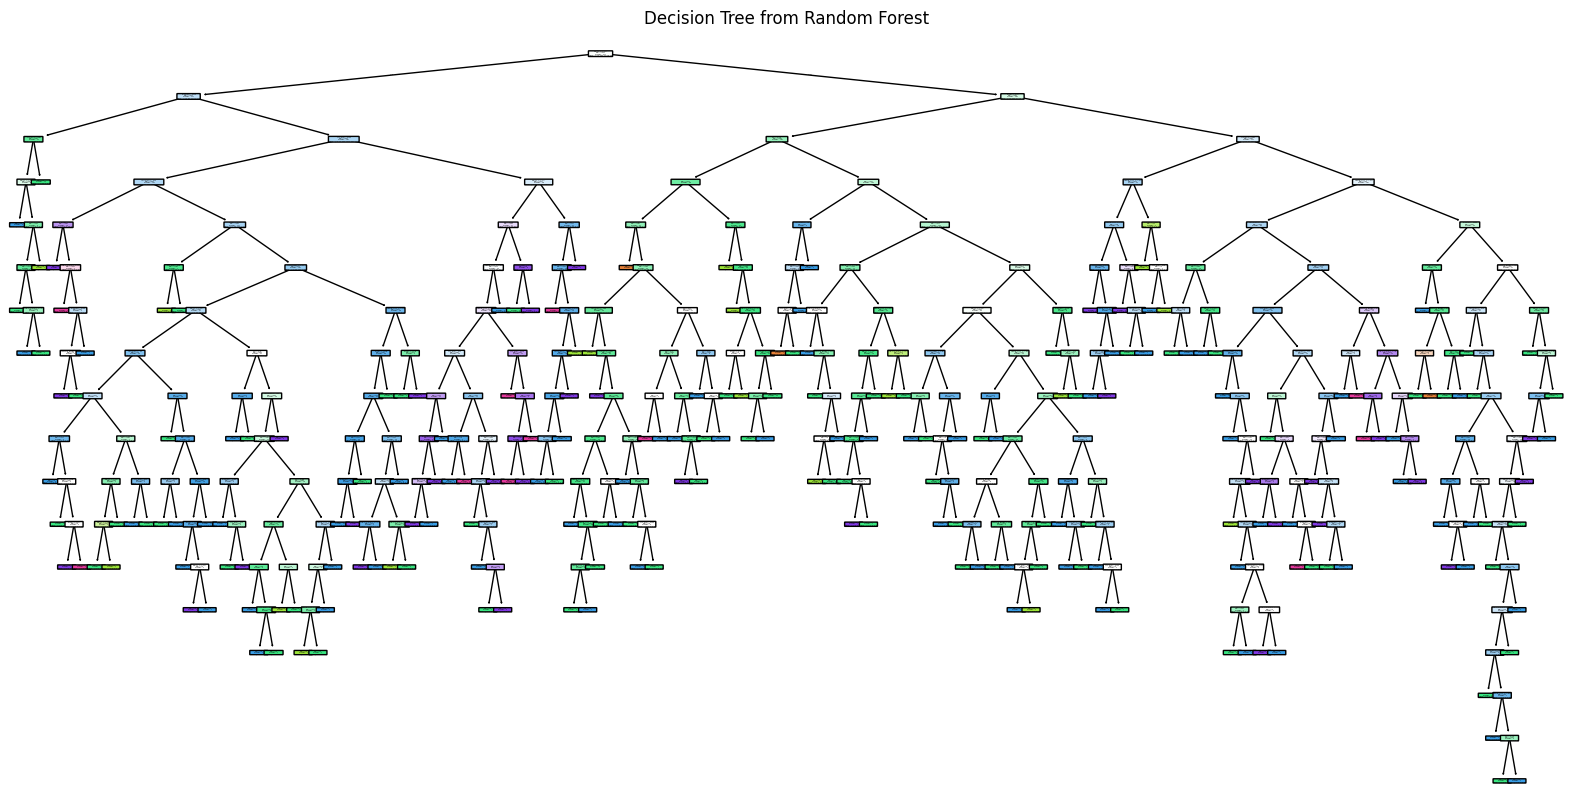

In [17]:
first_tree = random_forest_model.estimators_[14]


tree_rules = export_text(first_tree, feature_names=list(X.columns))
print(tree_rules)

plt.figure(figsize=(20, 10))
plot_tree(
    first_tree,
    feature_names=X.columns,
    # class_names=[2, 3,4,5],
    filled=True,
    rounded=True
)
plt.title("Decision Tree from Random Forest")
plt.show()
# sulphates,alcohol,sulphates,density

In [18]:
# 2. Regression on the California Housing Dataset
# Assignment Task:
# • Use the California Housing dataset to predict housing prices based on various factors
# like population, median income, and latitude/longitude.
# • Implement a Random Forest Regressor and perform a full train-test split on the
# dataset.
# • Evaluate the model performance using Mean Squared Error (MSE) and R-squared
# metrics. Plot learning curves and discuss how well the model generalizes.
# Additional Challenges:
# • Compare Random Forest Regressor's performance with other models like Decision
# Tree Regressor and Gradient Boosting Regressor.
# • Discuss the impact of feature scaling on model performance.

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor

housing = fetch_california_housing()
X=housing.data
y=housing.target


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [21]:
random_forest_regressor_model=RandomForestRegressor(random_state=42,n_estimators=10)
random_forest_regressor_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [22]:
random_forest_predicted_values=random_forest_regressor_model.predict(X_test)
print(r2_score(y_test,random_forest_predicted_values))
print(mean_squared_error(y_test,random_forest_predicted_values))


0.7831038080291017
0.28422271730492676


In [23]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(), X, y, cv=10, scoring='r2', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

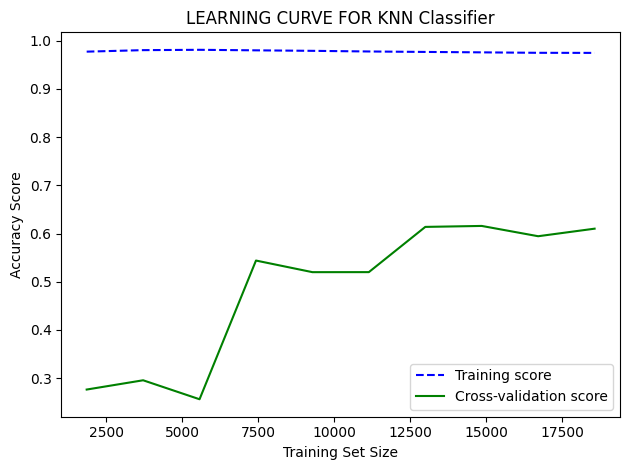

In [24]:
mean_training = np.mean(train_scores, axis=1) 
Standard_Deviation_training = np.std(train_scores, axis=1) 
  

mean_testing = np.mean(test_scores, axis=1) 
Standard_Deviation_testing = np.std(test_scores, axis=1) 
  

plt.plot(train_sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(train_sizes, mean_testing, color="g", label="Cross-validation score") 
  

plt.title("LEARNING CURVE FOR KNN Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

In [25]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor_model=DecisionTreeRegressor()
decision_tree_regressor_model.fit(X_train,y_train)
decision_tree_regressor_model_predicted_values=decision_tree_regressor_model.predict(X_test)
r2_score(y_test,decision_tree_regressor_model_predicted_values)

0.6227577266676049

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosting_regressor_model=GradientBoostingRegressor()
gradient_boosting_regressor_model.fit(X_train,y_train)


GradientBoostingRegressor()

In [27]:
gradient_boosting_regressor_model_predicted_values=gradient_boosting_regressor_model.predict(X_test)
r2_score(y_test,gradient_boosting_regressor_model_predicted_values)

0.7756446042829698

In [28]:
# 3. Classification and Regression on the Heart Disease Dataset
# Assignment Task:
# • Use the Heart Disease dataset to perform both classification and regression tasks.
# o Classification: Predict whether a patient has heart disease (binary
# classification) using Random Forest Classifier.
# o Regression: Predict the patient's maximum heart rate achieved during exercise
# using a Random Forest Regressor.
# • Perform feature engineering to handle missing data, and try techniques like feature
# scaling and one-hot encoding for categorical variables.
# •
# Additional Challenges:
# • Visualize the decision boundaries for the classifier.
# • Compare the model’s performance against a baseline classifier (like k-NN) and
# regressor (like linear regression).

In [36]:
hf_df=pd.read_csv('hf.csv')
X=hf_df.drop(columns=['DEATH_EVENT'])
y=hf_df['DEATH_EVENT']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
random_forest_classifier=RandomForestClassifier(n_estimators=10,random_state=42)
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [38]:
prediction_values=random_forest_classifier.predict(X_test)
accuracy_score(y_test,prediction_values)

0.6833333333333333

In [39]:
confusion_matrix(y_test,prediction_values)

array([[31,  4],
       [15, 10]])

<Axes: >

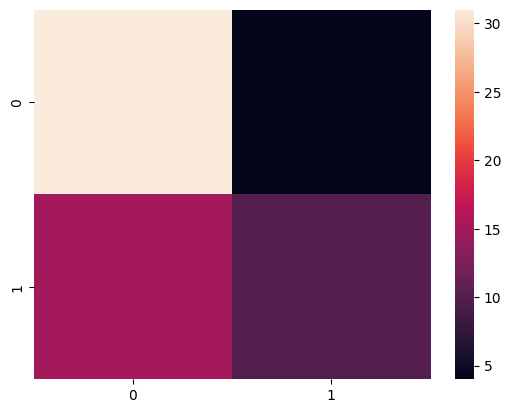

In [40]:
sns.heatmap(confusion_matrix(y_test,prediction_values))

In [41]:
print(classification_report(y_test,prediction_values))

              precision    recall  f1-score   support

           0       0.67      0.89      0.77        35
           1       0.71      0.40      0.51        25

    accuracy                           0.68        60
   macro avg       0.69      0.64      0.64        60
weighted avg       0.69      0.68      0.66        60



In [42]:
random_forest_reggresor=RandomForestRegressor(n_estimators=10,random_state=42)
random_forest_reggresor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [44]:
prediction_values=random_forest_reggresor.predict(X_test)
r2_score(y_test,prediction_values)

0.15794285714285716

In [45]:

mean_squared_error(y_test,prediction_values)

np.float64(0.20466666666666666)

In [46]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regressor_model=KNeighborsRegressor(n_neighbors=5)
kneighbor_regressor_model.fit(X_train,y_train)

KNeighborsRegressor()

In [48]:
predicted_values=kneighbor_regressor_model.predict(X_test)
r2_score(y_test,prediction_values)

0.15794285714285716

In [51]:
from sklearn.linear_model import LinearRegression
linear_regression_model=LinearRegression()
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [56]:
predicted_values=linear_regression_model.predict(X_test)
r2_score(y_test,prediction_values)

0.15794285714285716

In [57]:
mean_squared_error(y_test,predicted_values)

np.float64(0.17868807219099922)